## Import package + Téléchargement CIF

In [18]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.symmetry.analyzer import *
from pymatgen.io.cif import *
from pymatgen.core.operations import *
from tabulate import tabulate
from pymatgen.symmetry.site_symmetries import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [19]:
#Création du fichier CIF symmetrized 
with MPRester("2zPo57HHJnOTqpLHp5c") as m: 
        structure = m.get_structure_by_material_id("mp-9361")
        w=CifWriter(structure,symprec=0.1)
        w.write_file("RbLaS2_symmetrized.cif")
        

 ## 1 ère opération de symétrie étudiée : rotation d'ordre 3 dans la direction [0,0,1]
La première opération de symétrie étudiée est la rotation d'ordre 3 dans la direction [0,0,1] (opération 2 sur Jmol Crystal Symmetry Explorer pour le fichier cif correspondant à MoS2).

Cette opération a pour but d'envoyer tout atome, initialement en position (x,y,z), sur une position (-y, x-y, z).
Cela est réalisé via l'intermédiaire d'une matrice associée à la rotation et d'un vecteur associé à translation ( obtenus via les fonctions ci-dessous).Pour cette symétrie, nous obtenons la relation suivante:   

$ \begin{pmatrix} 0 & -1 & 0 \\ 1 & -1 & 0 \\ 0 & 0 & 1 \end{pmatrix} \cdot \left(\begin{array}{l}
{x} \\
{y} \\
{z}
\end{array}\right) = \left(\begin{array}{l}
{-y} \\
{x-y} \\
{z}
\end{array}\right) $


Si nous appliquons cette opération de symétrie sur l'atome S1 #5 de coordonnées $ [0.67,0.33,0.59] $ ,alors cet atome est renvoyé sur les  coordonnées  :  $[-0.33 , 0.34 , 0.59]$. 

Ci-dessous, nous pouvons trouver une illustration de cette symétrie appliquée sur l'atome étudié. 
La flèche rouge illustrée sur le schéma correspond à l'axe de rotation d'ordre 3.
 


In [20]:
print("atome de départ S1 #5: ")
print("[0.67,0.33,0.59]")

print("opération de symétrie : C3 axis (-y, x-y, z) " )
Op1 = SymmOp.from_xyz_string('-y, x-y, z')
print("La matrice de rotation de la symétrie étudiée est :")
print(Op1.rotation_matrix)
print("Le vecteur de translation de la symétrie étudiée est:")
print(Op1.translation_vector)


print ("effet de la symétrie sur S1 #5:")
S1S =Op1.operate((0.67,0.33,0.59)) 
print(S1S)
print("")



atome de départ S1 #5: 
[0.67,0.33,0.59]
opération de symétrie : C3 axis (-y, x-y, z) 
La matrice de rotation de la symétrie étudiée est :
[[ 0. -1.  0.]
 [ 1. -1.  0.]
 [ 0.  0.  1.]]
Le vecteur de translation de la symétrie étudiée est:
[0. 0. 0.]
effet de la symétrie sur S1 #5:
[-0.33  0.34  0.59]




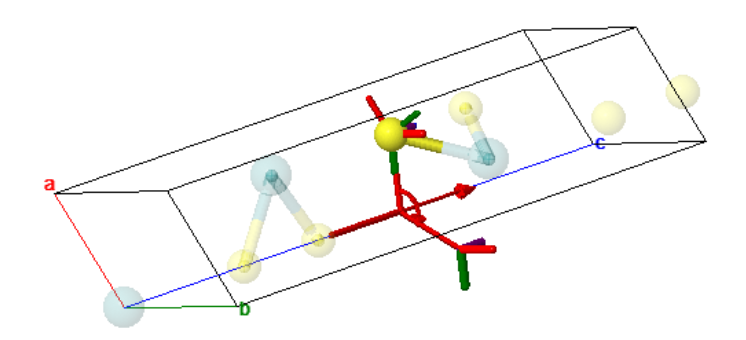

 ## 2 ème opération de symétrie étudiée : translation (x-1/3, y+1/3, z+1/3)
 
 La deuxième opération de symétrie étudiée est la translation  (x-1/3, y+1/3, z+1/3) (opération 7 sur Jmol Crystal Symmetry Explorer pour le fichier cif correspondant à MoS2).

Cette opération a pour but d'envoyer tout atome, initialement en position (x,y,z), sur une position (x-1/3, y+1/3, z+1/3).
Cela est réalisé via l'intermédiaire d'une matrice associée à la rotation et d'un vecteur associé à translation ( obtenus via les fonctions ci-dessous).Pour cette symétrie, nous obtenons la relation suivante:   

$ \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix} \cdot \left(\begin{array}{l}
{x} \\
{y} \\
{z}
\end{array}\right) + \left(\begin{array}{l}
{-1/3} \\
{1/3} \\
{1/3}
\end{array}\right) = \left(\begin{array}{l}
{x-1/3} \\
{y+1/3} \\
{z+1/3}
\end{array}\right) $


Si nous appliquons cette opération de symétrie sur l'atome Mo0 #4 de coordonnées $ [0.67,0.33,0.33] $ ,alors cet atome est renvoyé sur les  coordonnées  :  $[0.3367,0.6633,0.6633]$. 

Ci-dessous, nous pouvons trouver une illustration de cette symétrie appliquée sur l'atome étudié. 


In [21]:
print("atome de départ Mo0 #4: ")
print("[0.67,0.33,0.33]")

print("opération de symétrie : translation (x-1/3, y+1/3, z+1/3) " )
Op2 = SymmOp.from_xyz_string('x-1/3, y+1/3, z+1/3')
print("La matrice de transformation de la symétrie étudiée est :")
print(Op2.rotation_matrix)
print("Le vecteur de translation de la symétrie étudiée est:")
print(Op2.translation_vector)

print ("effet de la symétrie sur S1 #5:")
Mo0S =Op2.operate((0.67,0.33,0.33)) 
print(Mo0S)

atome de départ Mo0 #4: 
[0.67,0.33,0.33]
opération de symétrie : translation (x-1/3, y+1/3, z+1/3) 
La matrice de transformation de la symétrie étudiée est :
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Le vecteur de translation de la symétrie étudiée est:
[-0.33333333  0.33333333  0.33333333]
effet de la symétrie sur S1 #5:
[0.33666667 0.66333333 0.66333333]



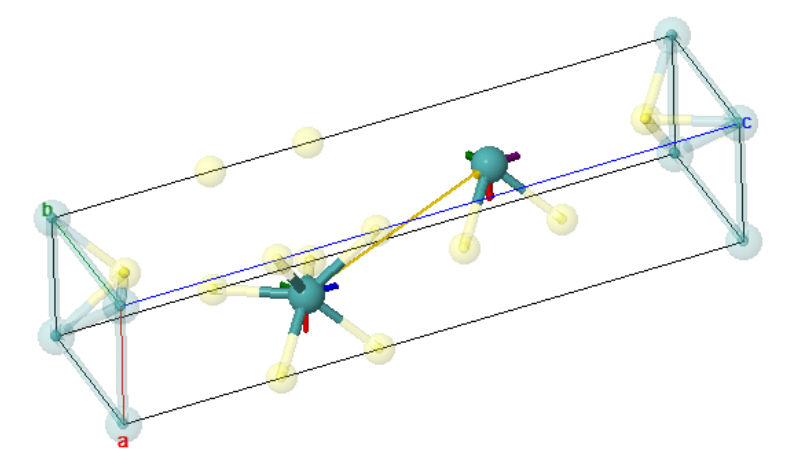

## 3  ème opération de symétrie étudiée : Rotation hélicoïdale $3_{1}$ (-y-1/3, x-y+1/3,z+1/3)


La troisième opération de symétrie étudiée est une rotation hélicoïdale $3_{1}$ (-y-1/3, x-y+1/3,z+1/3) (opération 8 sur Jmol Crystal Symmetry Explorer pour le fichier cif correspondant à MoS2).Son axe hélicoïdal est selon la direction [0,0,1].
La symétrie consiste en une rotation de $2\pi/3$ ainsi que d'une translation qui va se faire parallèlement à cet axe hélicoïdal et qui vaudra 1/3 du vecteur de base $\textbf{c}$.

Cette opération a pour but d'envoyer tout atome, initialement en postion (x,y,z), sur une position (-y-1/3, x-y+1/3,z+1/3).
Cela est réalisé via l'intermédiaire d'une matrice associée à la rotation et d'un vecteur associé à translation ( obtenus via les fonctions ci-dessous).Pour cette symétrie, nous obtenons la relation suivante:   

$ \begin{pmatrix} 0 & -1 & 0 \\ 1 & -1 & 0 \\ 0 & 0 & 1 \end{pmatrix} \cdot \left(\begin{array}{l}
{x} \\
{y} \\
{z}
\end{array}\right) + \left(\begin{array}{l}
{-1/3} \\
{1/3} \\
{1/3}
\end{array}\right) = \left(\begin{array}{l}
{-y-1/3} \\
{x-y+1/3} \\
{z+1/3}
\end{array}\right) $


Si nous appliquons cette opération de symétrie sur l'atome Mo0 #1 de coordonnées $ [0.00,0.00,0.00] $ ,alors cet atome est renvoyé sur les  coordonnées  :  $[-0.3333,0.3333,0.3333]$. 

Ci-dessous, nous pouvons trouver une illustration de cette symétrie appliquée sur l'atome étudié.

In [22]:
print("atome de départ Mo0 #1: ")
print("[0.00,0.00,0.00]")

print("opération de symétrie : 3-fold screw axis (-y-1/3, x-y+1/3,z+1/3) " )
Op3 = SymmOp.from_xyz_string('-y-1/3, x-y+1/3,z+1/3')
print("La matrice de transformation de la symétrie étudiée est :")
print(Op3.rotation_matrix)
print("Le vecteur de translation de la symétrie étudiée est:")
print(Op3.translation_vector)

print ("effet de la symétrie sur Mo0 #1:")
Mo0Sym =Op2.operate((0.00,0.00,0.00)) 
print(Mo0Sym)

atome de départ Mo0 #1: 
[0.00,0.00,0.00]
opération de symétrie : 3-fold screw axis (-y-1/3, x-y+1/3,z+1/3) 
La matrice de transformation de la symétrie étudiée est :
[[ 0. -1.  0.]
 [ 1. -1.  0.]
 [ 0.  0.  1.]]
Le vecteur de translation de la symétrie étudiée est:
[-0.33333333  0.33333333  0.33333333]
effet de la symétrie sur Mo0 #1:
[-0.33333333  0.33333333  0.33333333]




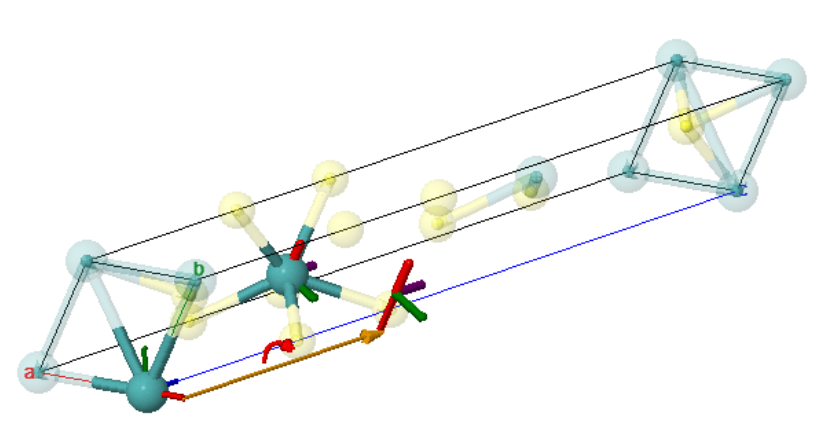

## Sources 
Les données fournies concernant l'étude du cristal MoS2 sont obtenues via le site Materials Project.
https://materialsproject.org/

Les images illustrées sont obtenues via : Jmol crystal symmetry explorer.
https://www.pslc.ws/jsmol/jcse/explore.htm
